In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as pltimg

from sklearn import datasets, metrics, tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

import statsmodels.api as smf


In [35]:
w1 = pd.read_csv(r'D:\ALY6020\4\week 4 - Nashville_housing_data.csv') #read the file
w1.head(5)

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [36]:
w1.info() # Check the type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [37]:
np.any(pd.isnull(w1))   #estimate exist of NaN
col_null= w1.isnull().sum(axis=0) # count all NaN data
col_null

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [38]:
w1.drop(w1.columns[4], axis=1, inplace=True) # drop the empty column


w2=w1.dropna(axis=0, how='any')   #delete NaN values
w2.reset_index(drop=True, inplace=True)    # reset index
w2

,Unnamed: 0,Parcel ID,Land Use,Property Address,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,City,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,1/11/2013,20130118-0006337,No,No,NASHVILLE,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,1/18/2013,20130124-0008033,No,No,NASHVILLE,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,1/18/2013,20130128-0008863,No,No,NASHVILLE,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,1/23/2013,20130131-0009929,No,No,NASHVILLE,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,1/4/2013,20130118-0006110,No,No,NASHVILLE,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22531,56602,176 01 0 003.00,SINGLE FAMILY,4617 ROCKLAND TRL,ANTIOCH,10/13/2016,20161019-0110290,No,No,ANTIOCH,...,105000,1758.00000,CRAWL,1996,BRICK/FRAME,C,3.0,2.0,0.0,Over
22532,56605,176 05 0 070.00,SINGLE FAMILY,5004 SUNSHINE DR,ANTIOCH,10/26/2016,20161102-0115842,No,No,ANTIOCH,...,142400,2421.00000,SLAB,1996,BRICK/FRAME,C,3.0,3.0,0.0,Over
22533,56607,176 09 0 003.00,SINGLE FAMILY,4964 HICKORY WOODS E,ANTIOCH,10/28/2016,20161031-0114817,No,No,ANTIOCH,...,159300,3117.00000,SLAB,1995,BRICK/FRAME,C,3.0,3.0,0.0,Over
22534,56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NASHVILLE,10/28/2016,20161102-0115988,No,No,NASHVILLE,...,204100,1637.00000,CRAWL,2004,FRAME,B,3.0,2.0,1.0,Over


In [39]:
cols = ['Parcel ID','Land Use','Property Address','Property City','Sale Date','Legal Reference','Sold As Vacant','Multiple Parcels Involved in Sale','City','State','Tax District','Foundation Type','Exterior Wall','Grade','Sale Price Compared To Value']     # replace str with number

def convert_item(item):
    return np.argwhere(uni == item)[0,0]
for col in cols:
    uni = w2[col].unique()
    w2[col] = w2[col].map(convert_item)
w2

C:\Users\91950\AppData\Local\Temp\ipykernel_12416\2820402004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w2[col] = w2[col].map(convert_item)


,Unnamed: 0,Parcel ID,Land Use,Property Address,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,City,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,0,0,0,0,0,0,0,0,0,...,134400,1149.00000,0,1941,0,0,2.0,1.0,0.0,0
1,2,1,0,1,0,1,1,0,0,0,...,157800,2090.82495,1,2000,1,0,3.0,2.0,1.0,0
2,3,2,0,2,0,1,2,0,0,0,...,243700,2145.60001,2,1948,1,1,4.0,2.0,0.0,1
3,4,3,0,3,0,2,3,0,0,0,...,138100,1969.00000,3,1910,2,0,2.0,1.0,0.0,1
4,5,4,0,4,0,3,4,0,0,0,...,86100,1037.00000,3,1945,2,0,2.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22531,56602,19626,0,20340,1,1038,22332,0,0,1,...,105000,1758.00000,3,1996,1,0,3.0,2.0,0.0,0
22532,56605,19627,0,20341,1,1037,22333,0,0,1,...,142400,2421.00000,1,1996,1,0,3.0,3.0,0.0,0
22533,56607,19628,0,20342,1,1034,22334,0,0,1,...,159300,3117.00000,1,1995,1,0,3.0,3.0,0.0,0
22534,56614,7522,0,20343,0,1034,22335,0,0,0,...,204100,1637.00000,3,2004,2,1,3.0,2.0,1.0,0


Linear Regression model:

In [40]:

from sklearn.linear_model import LinearRegression
y = w2[['Sale Price Compared To Value']]  #split data      0 means 'over',1 means 'under'
X = w2.iloc[:, list(range(24))] # 24 columns

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
Lin_Reg = LinearRegression()
Lin_Reg.fit(X_train,y_train)
Lin_Reg.score(X_test,y_test)  

0.1319768284246089

In [41]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train) 
est = sm.OLS(y_train,X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Sale Price Compared To Value   R-squared:                       0.130
Model:                                      OLS   Adj. R-squared:                  0.129
Method:                           Least Squares   F-statistic:                     122.5
Date:                          Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                                  15:05:35   Log-Likelihood:                -9163.2
No. Observations:                         18028   AIC:                         1.837e+04
Df Residuals:                             18005   BIC:                         1.855e+04
Df Model:                                    22                                         
Covariance Type:                      nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.2350      0.261      4.724      0.000       0.723       1.747
Unnamed: 0                         2.648e-05   8.94e-06      2.962      0.003    8.96e-06     4.4e-05
Parcel ID                            6.2e-06   1.62e-06      3.826      0.000    3.02e-06    9.38e-06
Land Use                              0.0368      0.012      2.966      0.003       0.012       0.061
Property Address                   8.355e-06    2.2e-06      3.803      0.000    4.05e-06    1.27e-05
Property City                        -0.0004      0.001     -0.281      0.778      -0.003       0.002
Sale Date                            -0.0008      0.000     -3.725      0.000      -0.001      -0.000
Legal Reference                   -6.601e-05   2.89e-05     -2.286      0.022      -0.000   -9.41e-06
Sold As Vacant                        0.5296      0.040     13.394      0.000       0.452       0.607
Multiple Parcels Involved in Sale    -0.0760      0.022     -3.483      0.000      -0.119      -0.033
City                                 -0.0004      0.001     -0.281      0.778      -0.003       0.002
State                             -9.793e-15   2.15e-15     -4.563      0.000    -1.4e-14   -5.59e-15
Acreage                               0.0111      0.006      1.891      0.059      -0.000       0.023
Tax District                          0.0187      0.004      4.374      0.000       0.010       0.027
Neighborhood                      -1.416e-06   2.12e-06     -0.669      0.504   -5.57e-06    2.73e-06
Land Value                        -4.154e-07   4.53e-08     -9.170      0.000   -5.04e-07   -3.27e-07
Building Value                     2.221e-07   3.45e-08      6.435      0.000    1.54e-07     2.9e-07
Finished Area                     -4.341e-06   7.61e-06     -0.571      0.568   -1.93e-05    1.06e-05
Foundation Type                       0.0034      0.003      1.131      0.258      -0.002       0.009
Year Built                           -0.0004      0.000     -2.798      0.005      -0.001      -0.000
Exterior Wall                        -0.0025      0.003     -0.858      0.391      -0.008       0.003
Grade                                 0.0366      0.004      8.896      0.000       0.029       0.045
Bedrooms                             -0.0014      0.005     -0.278      0.781      -0.011       0.008
Full Bath                             0.0056      0.006      0.937      0.349      -0.006       0.017
Half Bath                             0.0058      0.008      0.768      0.443      -0.009       0.021
==============================================================================
Omnibus:                     2241.025 

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.398e+03, tolerance: 4.187e-01
  model = cd_fast.enet_coordinate_descent(


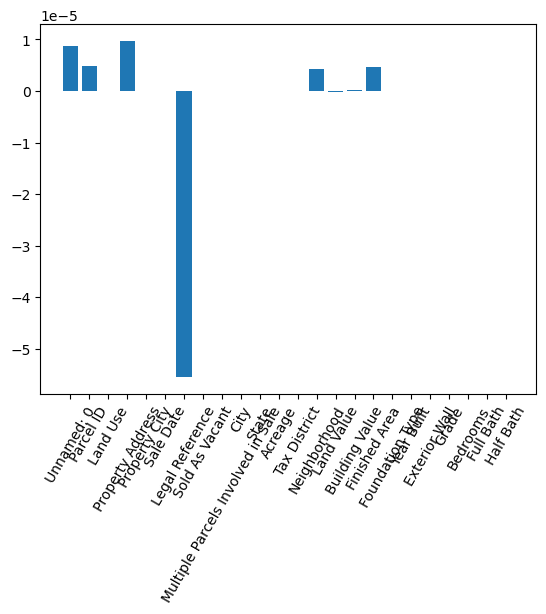

In [42]:
from sklearn.linear_model import Lasso

names = w2.drop("Sale Price Compared To Value", axis=1).columns
lasso = Lasso(alpha=0.5)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=60)
plt.show()

Linear regression: 
Here we have a linear regression model with 13% accuracy rate, which gives us only inaccurate information on the graphs. We couldn't find out exact linear relationship between the independent variables and the housing prices, since the outcome variable is a dichotomous variable which is hard to transfer into any linear pattern. 

decision tree model

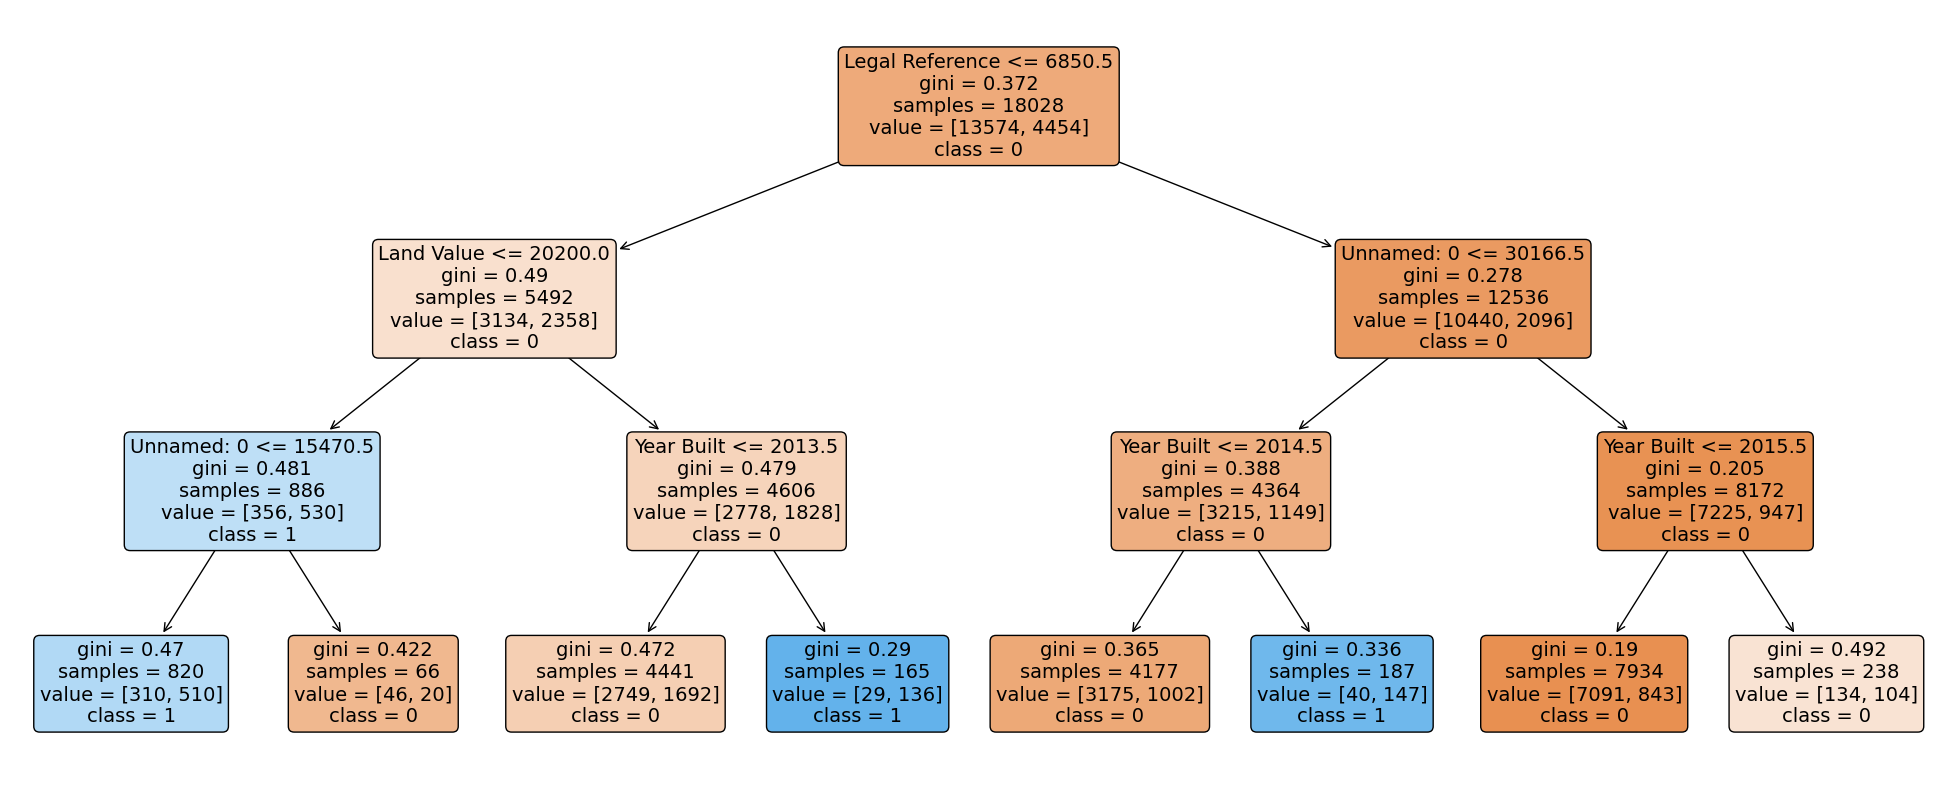

In [46]:
import time



treemodel = DecisionTreeClassifier(random_state=0, max_depth=3)
treemodel.fit(X_train, y_train)
plt.figure(figsize=(25,10))
plot=tree.plot_tree(treemodel, feature_names=X.columns.values.tolist(), 
                   class_names=['0','1', '2'],filled=True,rounded=True,
                   fontsize=14)

start_time_DT = time.perf_counter()

model=treemodel.fit(X_train, y_train)

end_time_DT = time.perf_counter()
fit_time_DT = end_time_DT - start_time_DT


In [47]:


#Predict the response for test dataset
pred_DT=y_pred = model.predict(X_test)
dtscore=model.score(X_test,y_test)
print("Accuracy:",dtscore)
print("Accuracy:", "{0:.0%}".format(model.score(X_test,y_test)))
print()
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.7755102040816326
Accuracy: 78%

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      3405
           1       0.66      0.17      0.27      1103

    accuracy                           0.78      4508
   macro avg       0.72      0.57      0.57      4508
weighted avg       0.75      0.78      0.72      4508

[[3306   99]
 [ 913  190]]


Here we have a decision tree model which has 78% of accuracy rate. When the outcome variable is 0, which is over the price, the precision rate is .78, and the recall rate is .97. Both are pretty high. However, when the outcome variable is 1, which is under the price, the precision rate is .66 and the recall rate is .17. When we would like to find some lands with prices under the market, the precision and recall rates of this model is not as high as the prices over the market. 

In [49]:
rfclass=RandomForestClassifier(n_estimators=20,random_state=0)

start_time_RF = time.perf_counter()

rfclass.fit(X_train,y_train)

end_time_RF = time.perf_counter()
fit_time_RF = end_time_RF - start_time_RF

pred_RF=rfypred=rfclass.predict(X_test)
rfscore=rfclass.score(X_test,y_test)
print("Accuracy:",rfscore)
print("Accuracy:", "{0:.0%}".format(rfclass.score(X_test,y_test)))
print()
print(metrics.classification_report(y_test,rfypred))
print(metrics.confusion_matrix(y_test,rfypred))

C:\Users\91950\AppData\Local\Temp\ipykernel_12416\1325133269.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclass.fit(X_train,y_train)


Accuracy: 0.786379769299024
Accuracy: 79%

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3405
           1       0.62      0.32      0.42      1103

    accuracy                           0.79      4508
   macro avg       0.72      0.63      0.65      4508
weighted avg       0.76      0.79      0.76      4508

[[3194  211]
 [ 752  351]]


Above is the Random Forest model, and the accuracy rate is 79%. When the outcome variable is 0, which is over the price, the precision rate is .81, and the recall rate is .94. Both are pretty high. However, when the outcome variable is 1, which is under the price, the precision rate is .62 and the recall rate is .32. When we would like to find some lands with prices under the market, the precision and recall rates of this model is not as high as the prices over the market. However, the F1-score for outcome 1 is higher than decision tree model. 

In [50]:
gbclass=GradientBoostingClassifier(n_estimators=20,random_state=0)

start_time_GB = time.perf_counter()

gbclass.fit(X_train, y_train)

end_time_GB = time.perf_counter()
fit_time_GB= end_time_GB - start_time_GB

pred_GB=gbypred=gbclass.predict(X_test)
gscore = gbclass.score(X_test,y_test)
print("Accuracy:",gscore)
print("Accuracy:", "{0:.0%}".format(gbclass.score(X_test,y_test)))
print()
print(metrics.classification_report(y_test,gbypred))
print(metrics.confusion_matrix(y_test,gbypred))

D:\ANACONDA\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7777284826974268
Accuracy: 78%

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      3405
           1       0.71      0.15      0.25      1103

    accuracy                           0.78      4508
   macro avg       0.75      0.57      0.56      4508
weighted avg       0.76      0.78      0.72      4508

[[3338   67]
 [ 935  168]]


Above is a gradient boosting model, which has a 78% of accuracy rate. When the outcome variable is 0, which is over the price, the precision rate is .78, and the recall rate is .98. Both are pretty high. However, when the outcome variable is 1, which is under the price, the precision rate is .71 and the recall rate is .15. When we would like to find some lands with prices under the market, the precision and recall rates of this model is not as high as the prices over the market. The F1 score of outcome 1 for this model is the lowest among the three models. 

In [51]:
print("Accuracy DT:", dtscore)
print("Accuracy RF:", rfscore)
print("Accuracy GB:",gscore)

Accuracy DT: 0.7755102040816326
Accuracy RF: 0.786379769299024
Accuracy GB: 0.7777284826974268


In [52]:
from sklearn.metrics import mean_squared_error

print("MSE DT:", mean_squared_error(y_test,pred_DT))
print("MSE RF:", mean_squared_error(y_test,pred_RF))
print("MSE GB:", mean_squared_error(y_test,pred_GB))

MSE DT: 0.22448979591836735
MSE RF: 0.21362023070097605
MSE GB: 0.2222715173025732


In [53]:
mse_DT = mean_squared_error(y_test,pred_DT)
mse_RF = mean_squared_error(y_test,pred_RF)
mse_GB = mean_squared_error(y_test,pred_GB)


In [54]:
from math import log
num_params = 24
def get_aic(n,pred_type):
    mse = mean_squared_error(y_test,pred_type)
    aic = n * log(mse)+2*num_params
    return aic

In [55]:
print(get_aic(len(y),pred_DT))
print(get_aic(len(y),pred_RF))
print(get_aic(len(y),pred_GB))

-33619.094370437
-34737.5659223157
-33842.88965545081


In [62]:
print('FIT TIME_DT:',fit_time_DT )
print('FIT TIME_RF:',fit_time_RF )
print('FIT TIME_GB:',fit_time_GB )


FIT TIME_DT: 0.042381000000006
FIT TIME_RF: 0.5473427000000015
FIT TIME_GB: 0.8540521000000183


Through benchmarking these models above, I would like to choose Random Forest for this dataset prediction: 
1. the accuracy rate is the highest among three models; 
2. the MSE is the smallest among three models
3. the AIC metric is also the smallest among three models 
4. Although the fit time isn't the shortest, but .54 is more acceptable than the gradient boosting model. 
5. Combining the precision rate, recall rate and F-1 score of the three models, we have the best combination in random forest model. 